In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf  # Statsmodels is a Python module for statistics

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm

from ISLP import load_data    # ISLP library for the book, it has built in functions and methods to build models 
from ISLP.models import (ModelSpec as MS, summarize , poly) # It also has built-in data that can be loaded

import matplotlib as mpl


#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'


sns.set(style="white") # Plot parameters defined globally
plt.style.use("seaborn-v0_8-white")

## 13) Linear Regression with Simulated data 

### a)-b)-c)

In [2]:
rng = np.random.default_rng(1)

x = rng.normal(loc = 0, scale = 1, size = 100)

eps = rng.normal(loc = 0, scale = 0.25, size = 100)

y = -1 + 0.5 * x + eps

In [6]:
print(f'y is a vector of {len(y)} entries')
print("\n")
print(f'beta_0 and beta_1 in this model are {-1} and {0.5} respectively')

y is a vector of 100 entries


beta_0 and beta_1 in this model are -1 and 0.5 respectively


### d)

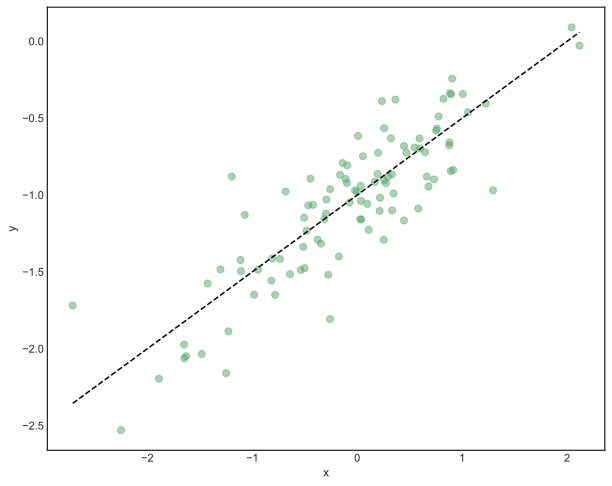

In [5]:
df = pd.DataFrame({'x': x, 'y': y})

fig, ax = plt.subplots(figsize = (10,8))

def lsline(axis, X, b, m, *args, **kwargs):
    
    "Add a line with slope m and intercept b to ax"
    xval = np.linspace(X.min(),X.max(),50)
    
    return axis.plot(xval, b + m * xval, *args, **kwargs)

sns.regplot(data = df, x = 'x', y = 'y', ax = ax, scatter_kws={'color': 'g', 's': 50, "alpha": 0.5}, fit_reg=False) 

lsline(ax, x, -1, 0.5, color = 'black', ls = 'dashed') # true population line

### No significant leverage points or outliers, rough linear relationship can be observed. 

### e)

In [8]:
SLRreg_fit = smf.ols(formula = 'y ~ x', data = df).fit()

print(SLRreg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.74e-30
Time:                        22:09:26   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0190      0.025    -40.537      0.0

### t-statistics for both coefficients are large, allow us to reject corresponding null hypotesis. Estimated values are pretty close to actual ones and of course the latter is contained within the confidence intervals of the coefficients. 

### f) 

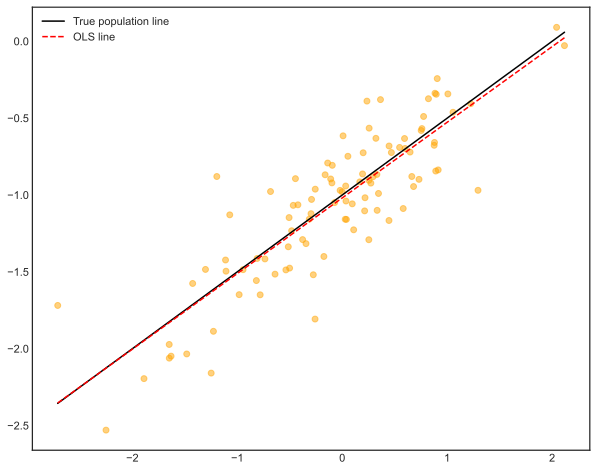

In [9]:
fig, axes = plt.subplots(figsize = (10,8))

axes.scatter(x='x', y='y', data=df, alpha = 0.5, color = 'orange', label = None)
lsline(axes, x, -1, 0.5, color = 'black', ls = '-', label = 'True population line') # true population line
lsline(axes, x, SLRreg_fit.params[0], SLRreg_fit.params[1], color = 'red', ls = 'dashed', label = 'OLS line') # estimated ols line 
axes.legend(loc = 'best')

### g) 

In [10]:
SLRreg_fit_quad = smf.ols(formula = 'y ~ x + np.power(x,2)', data = df).fit()

print(SLRreg_fit_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           3.66e-29
Time:                        22:11:32   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0182      0.030    -34.

### It is evident from the p-value of the quadratic term that there is no statistically significant relationship between $y$ and $x^2$. This is also evident from the $R^2$ value which does not improve at all even though the second model has an additional predictor.

### h) and i) 

In [11]:
leps = rng.normal(loc = 0, scale = 0.05, size = 100) # less spread noise
meps = rng.normal(loc = 0, scale = 0.7, size = 100) # more spread noise

yl = -1 + 0.5 * x + leps
ym = -1 + 0.5 * x + meps

In [12]:
dfln = pd.DataFrame({'x': x, 'yl':yl, })
dfmn = pd.DataFrame({'x': x, 'ym':ym})

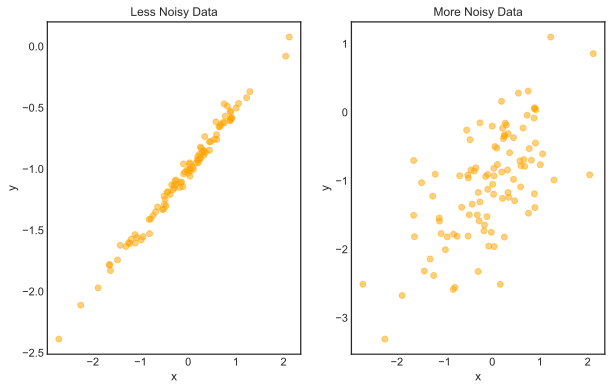

In [13]:
fig, axes = plt.subplots(1,2, figsize = (10,6))

axes[0].scatter(x='x', y='yl', data=dfln, alpha = 0.5, color = 'orange', label = None)
axes[1].scatter(x='x', y='ym', data=dfmn, alpha = 0.5, color = 'orange', label = None)

titles = ['Less Noisy Data', 'More Noisy Data']
for i in range(2):

    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(titles[i])

In [14]:
SLRreg_fitln = smf.ols(formula = 'yl ~ x', data = dfln).fit()
SLRreg_fitmn = smf.ols(formula = 'ym ~ x', data = dfmn).fit()


print(SLRreg_fitln.summary(),SLRreg_fitmn.summary())

                            OLS Regression Results                            
Dep. Variable:                     yl   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     8503.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           4.84e-97
Time:                        22:23:26   Log-Likelihood:                 166.78
No. Observations:                 100   AIC:                            -329.6
Df Residuals:                      98   BIC:                            -324.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0081      0.005   -217.791      0.0

### Fit to the less noisy data performs much better as expected: t-statistics are better and confidence intervals for the coefficients shrink and $R^2$ score of the model is improved much more compared to the baseline model with mild variance in the noise. On the other hand, more noisy data leads to completely opposite results. 

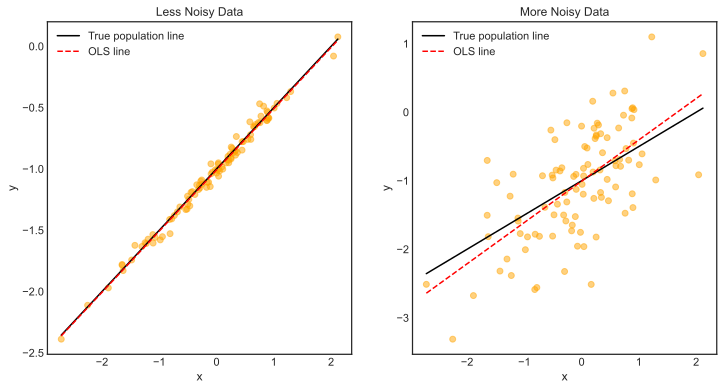

In [15]:
fig, axes = plt.subplots(1,2, figsize = (12,6), sharey=False)

axes[0].scatter(x='x', y='yl', data=dfln, alpha = 0.5, color = 'orange', label = None)
axes[1].scatter(x='x', y='ym', data=dfmn, alpha = 0.5, color = 'orange', label = None)

titles = ['Less Noisy Data', 'More Noisy Data']


lsline(axes[0], x, -1, 0.5, color = 'black', ls = '-', label = 'True population line') # true population line
lsline(axes[0], x, SLRreg_fitln.params[0], SLRreg_fitln.params[1], color = 'red', ls = 'dashed', label = 'OLS line') # estimated ols line 

lsline(axes[1], x, -1, 0.5, color = 'black', ls = '-', label = 'True population line') 
lsline(axes[1], x, SLRreg_fitmn.params[0], SLRreg_fitmn.params[1], color = 'red', ls = 'dashed', label = 'OLS line') 

for i in range(2):

    axes[i].set_xlabel('x')
    axes[i].set_ylabel('y')
    axes[i].set_title(titles[i])
    axes[i].legend(loc = 'best')

### j) 

In [16]:
models = [SLRreg_fitln,SLRreg_fit,SLRreg_fitmn]

for model in models:

    print(f'Confindence intervals for the intercept and slope for the less noisy data are {model.conf_int().values[0]} and {model.conf_int().values[1]}')

Confindence intervals for the intercept and slope for the less noisy data are [-1.01728193 -0.99891076] and [0.48861424 0.51010772]
Confindence intervals for the intercept and slope for the less noisy data are [-1.06889099 -0.96912179] and [0.43378268 0.55050833]
Confindence intervals for the intercept and slope for the less noisy data are [-1.12789755 -0.88492491] and [0.46076235 0.74502981]


### Confidence intervals are getting bigger as the data becomes more noisy, implying we will have more uncertainty for the estimates on the slope and intercept. 